# Comparing Kinematic Model to the Physical Model
@author: Max Felius

- Comparing the vertical displacement and the horizontal displacement to observe the differences
- Comparing the evolving kinematic model with the evolving physical model.

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
Geometric model - Influence functions
'''
def zg(x,x0,y,y0,R):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    return -np.exp(-np.pi * ((r**2)/(R**2)))

def xhdisp(x,x0,y,y0,R,H):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    return ((x-x0)/H)*zg(x,x0,y,y0,R)

def yhdisp(x,x0,y,y0,R,H):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)    
    return ((y-y0)/H)*zg(x,x0,y,y0,R)

def hdisp(x,x0,y,y0,R,H):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)    
    return (r/H)*zg(x,x0,y,y0,R)

'''
Physical model - Mogi Model
'''
def mogi(dV,v,x,y,z,x0,y0,z0):
    r = np.sqrt((x-x0)**2 + (y-y0)**2 + (z-z0)**2)
    return dV * ((1-v)/np.pi) * np.array([(x-x0)/r**3,(y-y0)/r**3,(z-z0)/r**3])
    
'''
Other functions
'''
#defining time function
def time_function(t,t0,a,b,mode):
    if t-t0 <= 0:
        return 0
    else:
        if mode == 'linear':
            return -a*(t-t0)
        elif mode == 'poly':
            return -a*(t-t0)**2 - b*(t-t0)
        elif mode == 'exp':
            return -a*np.exp((t-t0))
        elif mode == 'log':
            return -a*np.log(1+b*(t-t0))
        else:
            print('No mode selected')
            return 0

In [3]:
#define parameters
# x0_center = 20
n = 300
x_range = 20
y_range = 20

#impending sinkholes
R = 15
draw = np.deg2rad(35)
H = R*np.tan(draw)

#mogi parameters
poisson = 0.3
Volume = (4/3) * np.pi * (1/2)**3
x0 = 0
y0 = 0
z0 = -H

# 1D array
x = np.linspace(-x_range+x0,x_range+x0,n)
y = np.linspace(-y_range+y0,y_range+y0,n)
z = np.zeros((n))

#2D array
zv = np.zeros((n,n))
xv, yv = np.meshgrid(x,y)

In [4]:
de, dn, du = mogi(-Volume,poisson,xv,yv,zv,x0,y0,z0)
de1D, dn1D, du1D = mogi(-Volume,poisson,x,y,z,x0,y0,z0)
max_sub = -np.min(du)

In [5]:
#define geometric model
geom_subs = max_sub*zg(xv,x0,yv,y0,R)
geom_subs_1D = max_sub*zg(x,x0,y,y0,R)
geom_xhdisp = max_sub*xhdisp(xv,x0,yv,y0,R,H)
geom_xhdisp_1D = max_sub*xhdisp(x,x0,y,y0,R,H)
geom_yhdisp = max_sub*yhdisp(xv,x0,yv,y0,R,H)

In [6]:
#calculate magnitude of both models
physical_mag = np.sqrt((de**2)+(dn**2)+(du**2))
geometry_mag = np.sqrt((geom_xhdisp**2)+(geom_yhdisp**2)+(geom_subs**2))

## Comparing displacements

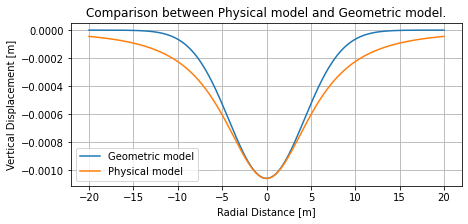

In [7]:
plt.figure(figsize=(7,3))

plt.plot(x,geom_subs_1D,label='Geometric model')
plt.plot(x,du1D,label='Physical model')

plt.title('Comparison between Physical model and Geometric model.')
plt.ylabel('Vertical Displacement [m]')
plt.xlabel('Radial Distance [m]')
plt.grid(True)
plt.legend();

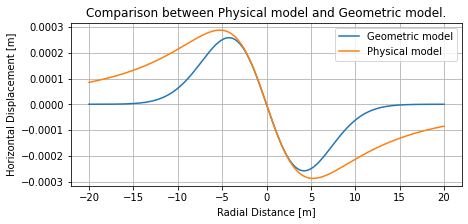

In [8]:
plt.figure(figsize=(7,3))

plt.plot(x,geom_xhdisp_1D,label='Geometric model')
plt.plot(x,de1D,label='Physical model')

plt.title('Comparison between Physical model and Geometric model.')
plt.ylabel('Horizontal Displacement [m]')
plt.xlabel('Radial Distance [m]')
plt.grid(True)
plt.legend();

In [9]:
idx_geom = np.where(np.max(geom_xhdisp_1D)==geom_xhdisp_1D)
idx_de1D = np.where(np.max(de1D)==de1D)

In [10]:
idx_geom[0][0]

118

Location of the maximum displacement of the geometric model is -4.21 m
Location of the maximum displacement of the physical model is -5.28 m


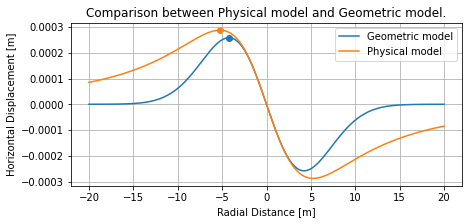

In [11]:
plt.figure(figsize=(7,3))

plt.plot(x,geom_xhdisp_1D,label='Geometric model')
plt.plot(x,de1D,label='Physical model')

plt.scatter(x[idx_geom[0][0]],geom_xhdisp_1D[idx_geom[0][0]])
plt.scatter(x[idx_de1D[0][0]],de1D[idx_de1D[0][0]])

plt.title('Comparison between Physical model and Geometric model.')
plt.ylabel('Horizontal Displacement [m]')
plt.xlabel('Radial Distance [m]')
plt.grid(True)
plt.legend();

print('Location of the maximum displacement of the geometric model is {:.02f} m'.format(x[idx_geom[0][0]]))
print('Location of the maximum displacement of the physical model is {:.02f} m'.format(x[idx_de1D[0][0]]))

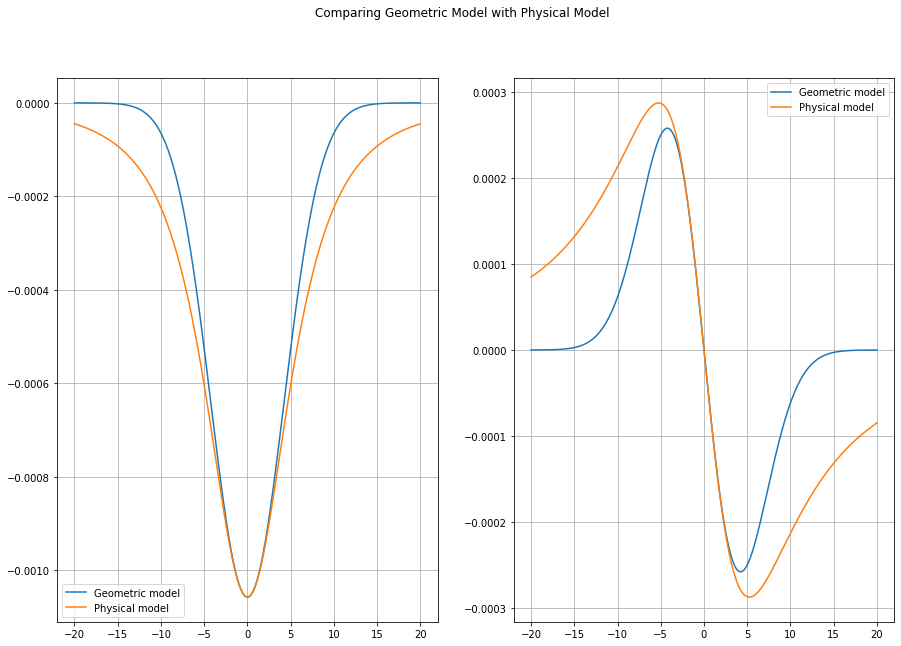

In [12]:
fig, ax = plt.subplots(figsize=(15,10),ncols=2)

#---------plot subsidence ---------
ax[0].plot(x,geom_subs_1D,label='Geometric model')
ax[0].plot(x,du1D,label='Physical model')

ax[0].grid(True)
ax[0].legend()

#---------plot horizontal displacement --------
ax[1].plot(x,geom_xhdisp_1D,label='Geometric model')
ax[1].plot(x,de1D,label='Physical model')

ax[1].grid(True)
ax[1].legend()
#---------admin stuff---------
fig.suptitle('Comparing Geometric Model with Physical Model');

## Comparing time series of the displacements

In [13]:
Volume

0.5235987755982988

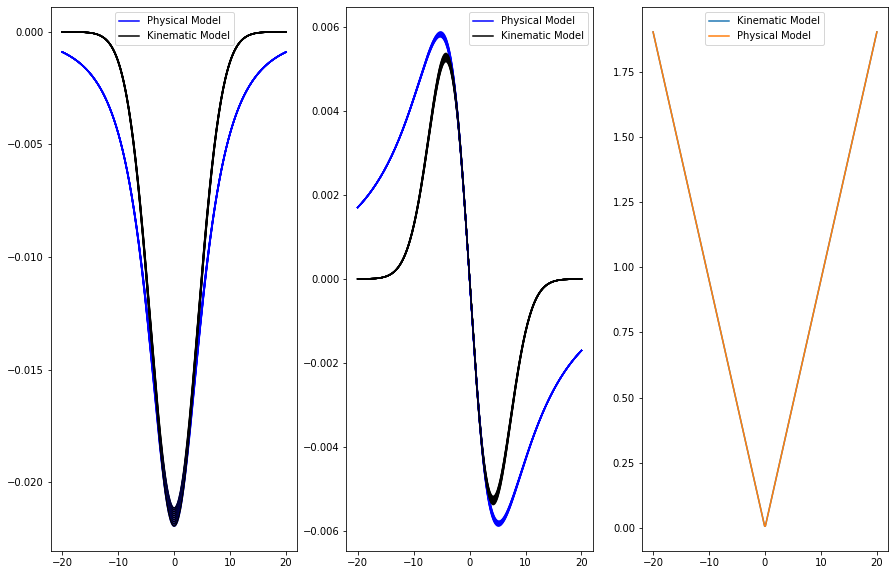

In [14]:
#recompute the variables
geom_1D = zg(x,x0,y,y0,R)
de1D, dn1D, du1D = mogi(-Volume,poisson,x,y,z,x0,y0,z0)
Volume = 20 * (4/3) * np.pi * (1/2)**3

#compute some variables
tn = 10
t = np.linspace(-1,6,tn)        
t0 = 0
a = 0.01
b = 0.01

zl = np.array([time_function(x,t0,a,b,'linear') for x in t])

#-----create figure-----#
fig, ax = plt.subplots(ncols=3,figsize=(15,10))
save_max_sub = []

#---------plot subsidence ---------
tg = 0
x_mogi = x
y_mogi = y
z_mogi = z

for _ in zl:
    
    de1D, dn1D, du1D = mogi(-1*Volume,poisson,x_mogi,y_mogi,z_mogi,x0,y0,z0)
    max_sub = -np.min(du1D)
    
    if tg == 0:
        ax[0].plot(x,du1D,c='b',label='Physical Model')        
        ax[0].plot(x,max_sub*geom_1D,c='k',label='Kinematic Model')
    else:
        ax[0].plot(x,du1D,c='b')        
        ax[0].plot(x,max_sub*geom_1D,c='k')        
    
    ax[0].legend()

    
#---------plot horizontal displacement --------
    if tg == 0:
        ax[1].plot(x,de1D,c='b',label='Physical Model')        
        ax[1].plot(x,max_sub*xhdisp(x,x0,y,y0,R,H),c='k',label='Kinematic Model')
    else:
        ax[1].plot(x,de1D,c='b')        
        ax[1].plot(x,max_sub*xhdisp(x,x0,y,y0,R,H),c='k')     

    ax[1].legend()

#---------plot percentage displacement --------
    if tg == tn-1:
        ax[2].plot(x,np.abs(max_sub*xhdisp(x,x0,y,y0,R,H))/np.abs(max_sub*geom_1D),label='Kinematic Model')
        ax[2].plot(x,np.abs(de1D)/np.abs(du1D),label='Physical Model')
        ax[2].legend()
    
    #update coordinates physical model
    x_mogi = x_mogi + de1D
    y_mogi = y_mogi + dn1D
    z_mogi = z_mogi + du1D
    tg += 1
    save_max_sub.append(max_sub)

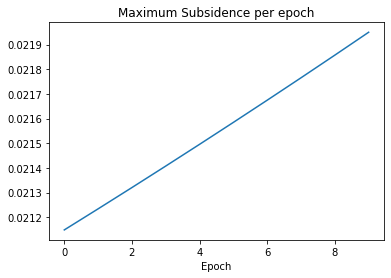

In [15]:
plt.figure()
plt.plot(range(len(save_max_sub)),save_max_sub)

plt.xlabel('Epoch')
plt.title('Maximum Subsidence per epoch');

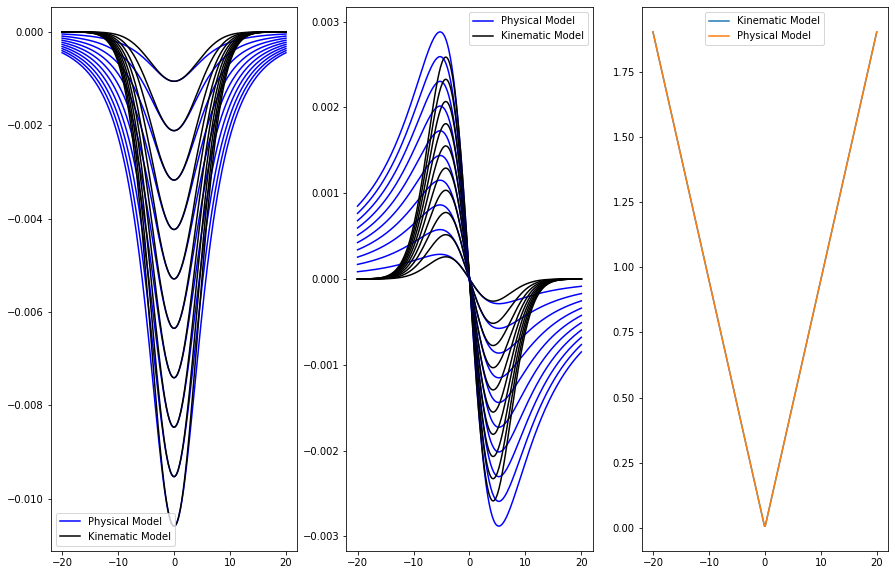

In [16]:
'''
Not the magnitude of the point change but the new location of the point is plotted in this cell.
'''

#recompute the variables
geom_1D = zg(x,x0,y,y0,R)
de1D, dn1D, du1D = mogi(-Volume,poisson,x,y,z,x0,y0,z0)
Volume = (4/3) * np.pi * (1/2)**3

#compute some variables
tn = 10
t = np.linspace(-1,6,tn)        
t0 = 0
a = 0.01
b = 0.01

zl = np.array([time_function(x,t0,a,b,'linear') for x in t])

#-----create figure-----#
fig, ax = plt.subplots(ncols=3,figsize=(15,10))
save_max_sub2 = []

#---------plot subsidence ---------
tg = 0
x_mogi = x
y_mogi = y
z_mogi = z

for _ in zl:
    
    de1D, dn1D, du1D = mogi(-1*Volume,poisson,x_mogi,y_mogi,z_mogi,x0,y0,z0)
    
    #update coordinates physical model - new surface shape
    x_mogi = x_mogi + de1D
    y_mogi = y_mogi + dn1D
    z_mogi = z_mogi + du1D
    
    
    max_sub = -np.min(z_mogi)
    
    if tg == 0:
        ax[0].plot(x,z_mogi,c='b',label='Physical Model')        
        ax[0].plot(x,max_sub*geom_1D,c='k',label='Kinematic Model')
    else:
        ax[0].plot(x,z_mogi,c='b')        
        ax[0].plot(x,max_sub*geom_1D,c='k')        
    
    ax[0].legend()

    
#---------plot horizontal displacement --------
    if tg == 0:
#         ax[1].plot(x,de1D,c='b',label='Physical Model')
        ax[1].plot(x,x_mogi-x,c='b',label='Physical Model')  
        ax[1].plot(x,max_sub*xhdisp(x,x0,y,y0,R,H),c='k',label='Kinematic Model')
    else:
#         ax[1].plot(x,de1D,c='b')
        ax[1].plot(x,x_mogi-x,c='b')  
        ax[1].plot(x,max_sub*xhdisp(x,x0,y,y0,R,H),c='k')     

    ax[1].legend()

#---------plot percentage displacement --------
    if tg == tn-1:
        ax[2].plot(x,np.abs(max_sub*xhdisp(x,x0,y,y0,R,H))/np.abs(max_sub*geom_1D),label='Kinematic Model')
        ax[2].plot(x,np.abs(de1D)/np.abs(du1D),label='Physical Model')
        ax[2].legend()
    

    tg += 1
    save_max_sub2.append(max_sub)

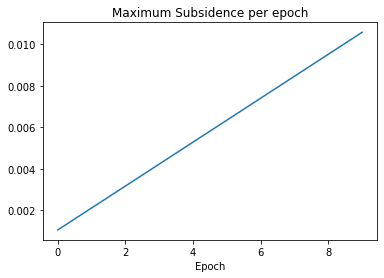

In [17]:
plt.figure()
plt.plot(range(len(save_max_sub2)),save_max_sub2)

plt.xlabel('Epoch')
plt.title('Maximum Subsidence per epoch');

In [18]:
x[120]

-3.9464882943143813

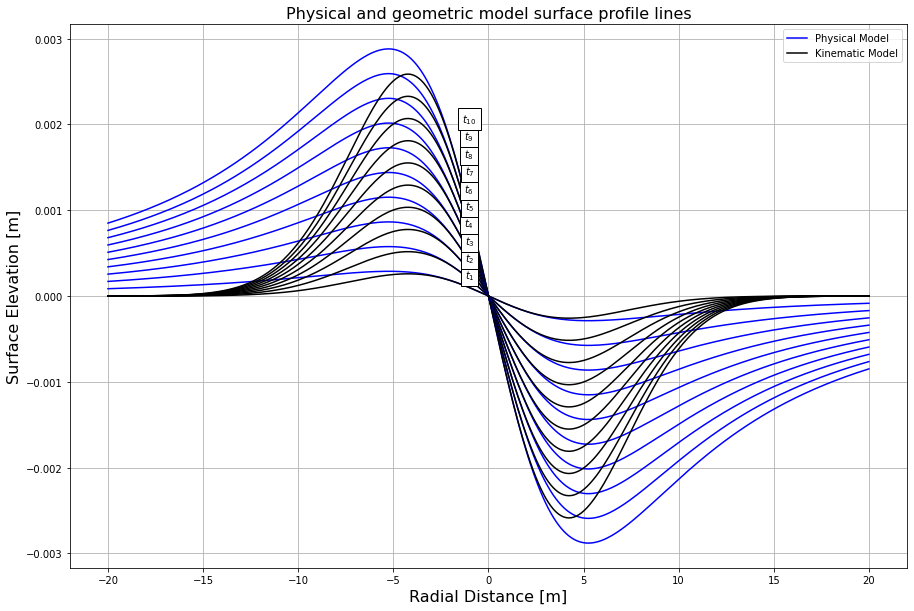

In [19]:
'''
Not the magnitude of the point change but the new location of the point is plotted in this cell.
'''

#recompute the variables
geom_1D = zg(x,x0,y,y0,R)
de1D, dn1D, du1D = mogi(-Volume,poisson,x,y,z,x0,y0,z0)
Volume = (4/3) * np.pi * (1/2)**3

#compute some variables
tn = 10
t = np.linspace(-1,6,tn)        
t0 = 0
a = 0.01
b = 0.01

zl = np.array([time_function(x,t0,a,b,'linear') for x in t])

#-----create figure-----#
fig, ax = plt.subplots(ncols=1,figsize=(15,10))
save_max_sub2 = []

#---------plot subsidence ---------
tg = 0
x_mogi = x
y_mogi = y
z_mogi = z

for _ in zl:
    
    de1D, dn1D, du1D = mogi(-1*Volume,poisson,x_mogi,y_mogi,z_mogi,x0,y0,z0)
    
    #update coordinates physical model - new surface shape
    x_mogi = x_mogi + de1D
    y_mogi = y_mogi + dn1D
    z_mogi = z_mogi + du1D
    
    
    max_sub = -np.min(z_mogi)
    xdisp=max_sub*xhdisp(x,x0,y,y0,R,H)
    
    if tg == 0:
#         ax[1].plot(x,de1D,c='b',label='Physical Model')
        ax.plot(x,x_mogi-x,c='b',label='Physical Model')  
        ax.plot(x,xdisp,c='k',label='Kinematic Model')
    else:
#         ax[1].plot(x,de1D,c='b')
        ax.plot(x,x_mogi-x,c='b')  
        ax.plot(x,xdisp,c='k')         
    
    ax.annotate('$t_{'+str(tg+1)+'}$' , # this is the text
                 (-1,xdisp[132]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 bbox=dict(facecolor='white', edgecolor='black'),
                 ha='center')
    
    tg -= -1

ax.set_title('Physical and geometric model surface profile lines',fontsize=16)
ax.set_xlabel('Radial Distance [m]',fontsize=16)
ax.set_ylabel('Surface Elevation [m]',fontsize=16)
ax.legend()
ax.grid(True)

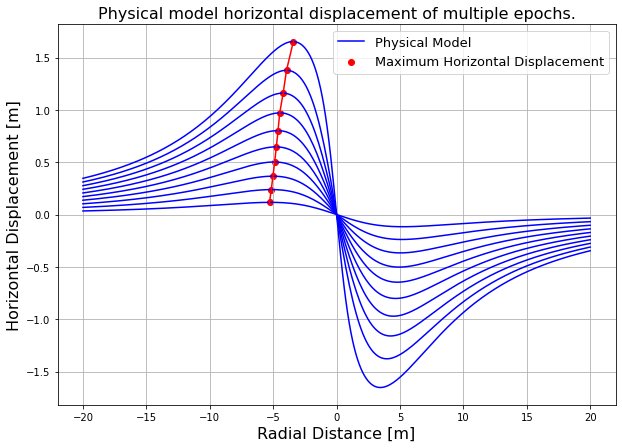

In [41]:
'''
Not the magnitude of the point change but the new location of the point is plotted in this cell.
'''

#recompute the variables
geom_1D = zg(x,x0,y,y0,R)
de1D, dn1D, du1D = mogi(-Volume,poisson,x,y,z,x0,y0,z0)
Volume = 400*(4/3) * np.pi * (1/2)**3

#compute some variables
tn = 10
t = np.linspace(-1,6,tn)        
t0 = 0
a = 0.01
b = 0.01

zl = np.array([time_function(x,t0,a,b,'linear') for x in t])

#-----create figure-----#
fig, ax = plt.subplots(ncols=1,figsize=(10,7))
save_max_sub2 = []
save_max_disp = []
save_max_disp_idx = []

#---------plot subsidence ---------
tg = 0
x_mogi = x
y_mogi = y
z_mogi = z

for _ in zl:
    
    de1D, dn1D, du1D = mogi(-1*Volume,poisson,x_mogi,y_mogi,z_mogi,x0,y0,z0)
    
    #update coordinates physical model - new surface shape
    x_mogi = x_mogi + de1D
    y_mogi = y_mogi + dn1D
    z_mogi = z_mogi + du1D
    
    
    max_sub = -np.min(z_mogi)
    xdisp=max_sub*xhdisp(x,x0,y,y0,R,H)
    mogi_disp = x_mogi-x
    
    
    if tg == 0:
#         ax[1].plot(x,de1D,c='b',label='Physical Model')
        ax.plot(x,mogi_disp,c='b',label='Physical Model')  
#         ax.plot(x,xdisp,c='k',label='Kinematic Model')
    else:
#         ax[1].plot(x,de1D,c='b')
        ax.plot(x,mogi_disp,c='b')  
#         ax.plot(x,xdisp,c='k')         
    
#     ax.annotate('$t_{'+str(tg+1)+'}$' , # this is the text
#                  (-1,xdisp[132]), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,0), # distance from text to points (x,y)
#                  bbox=dict(facecolor='white', edgecolor='black'),
#                  ha='center')
    
    
    max_disp = np.where(np.max(mogi_disp)==mogi_disp)[0][0]
    if tg == 0:
        ax.scatter(x[max_disp],mogi_disp[max_disp],c='r',label='Maximum Horizontal Displacement')
    else:
        ax.scatter(x[max_disp],mogi_disp[max_disp],c='r')
    
    tg -= -1
    
    save_max_disp.append(mogi_disp[max_disp])
    save_max_disp_idx.append(max_disp)

    
ax.plot(x[save_max_disp_idx],save_max_disp,c='r')
ax.set_title('Physical model horizontal displacement of multiple epochs.',fontsize=16)
ax.set_xlabel('Radial Distance [m]',fontsize=16)
ax.set_ylabel('Horizontal Displacement [m]',fontsize=16)
ax.legend(fontsize=13)
ax.grid(True)

In [42]:
fig.savefig('Mogi_Hor_disp_change.png')

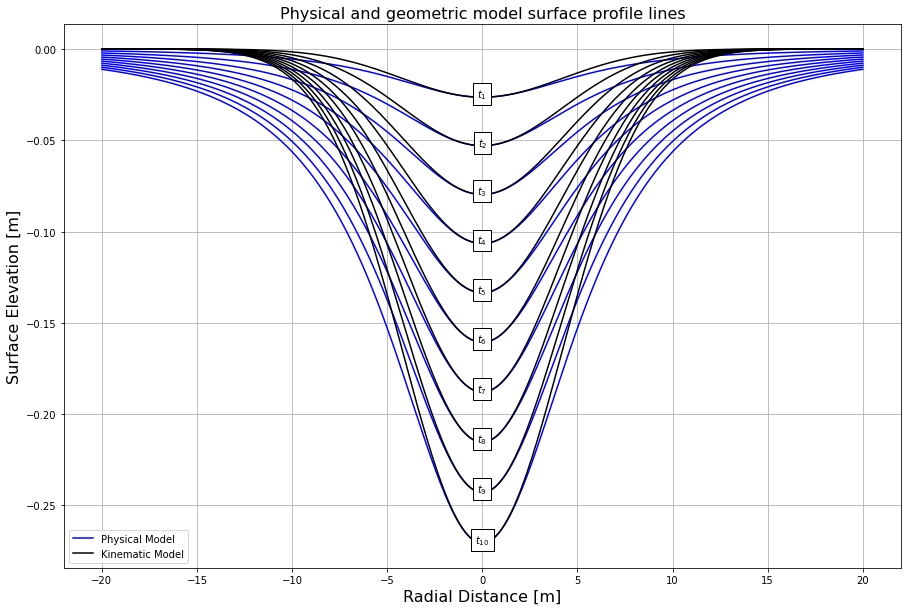

In [21]:
'''
Not the magnitude of the point change but the new location of the point is plotted in this cell.
'''

#recompute the variables
geom_1D = zg(x,x0,y,y0,R)
de1D, dn1D, du1D = mogi(-Volume,poisson,x,y,z,x0,y0,z0)
Volume = 25*(4/3) * np.pi * (1/2)**3

#compute some variables
tn = 10
t = np.linspace(-1,6,tn)        
t0 = 0
a = 0.01
b = 0.01

zl = np.array([time_function(x,t0,a,b,'linear') for x in t])

#-----create figure-----#
fig, ax = plt.subplots(ncols=1,figsize=(15,10))
save_max_sub2 = []

#---------plot subsidence ---------
tg = 0
x_mogi = x
y_mogi = y
z_mogi = z

for _ in zl:
    
    de1D, dn1D, du1D = mogi(-1*Volume,poisson,x_mogi,y_mogi,z_mogi,x0,y0,z0)
    
    #update coordinates physical model - new surface shape
    x_mogi = x_mogi + de1D
    y_mogi = y_mogi + dn1D
    z_mogi = z_mogi + du1D
    
    
    max_sub = -np.min(z_mogi)
    if tg == 0:
        ax.plot(x,z_mogi,c='b',label='Physical Model')        
        ax.plot(x,max_sub*geom_1D,c='k',label='Kinematic Model')
    else:
        ax.plot(x,z_mogi,c='b')        
        ax.plot(x,max_sub*geom_1D,c='k')        
    
    ax.annotate('$t_{'+str(tg+1)+'}$' , # this is the text
                 (0,-max_sub), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 bbox=dict(facecolor='white', edgecolor='black'),
                 ha='center')
    
    tg -= -1
    save_max_sub2.append(max_sub)
    
ax.set_title('Physical and geometric model surface profile lines',fontsize=16)
ax.set_xlabel('Radial Distance [m]',fontsize=16)
ax.set_ylabel('Surface Elevation [m]',fontsize=16)
ax.legend()
ax.grid(True)

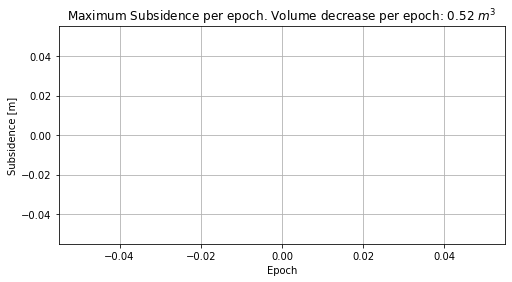

In [29]:
plt.figure(figsize=(8,4))
plt.plot(range(1,len(save_max_sub2)+1),-np.array(save_max_sub2))

plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Subsidence [m]')
plt.title('Maximum Subsidence per epoch. Volume decrease per epoch: {:.02f} $m^3$'.format(Volume));

In [28]:
Volume

0.5235987755982988

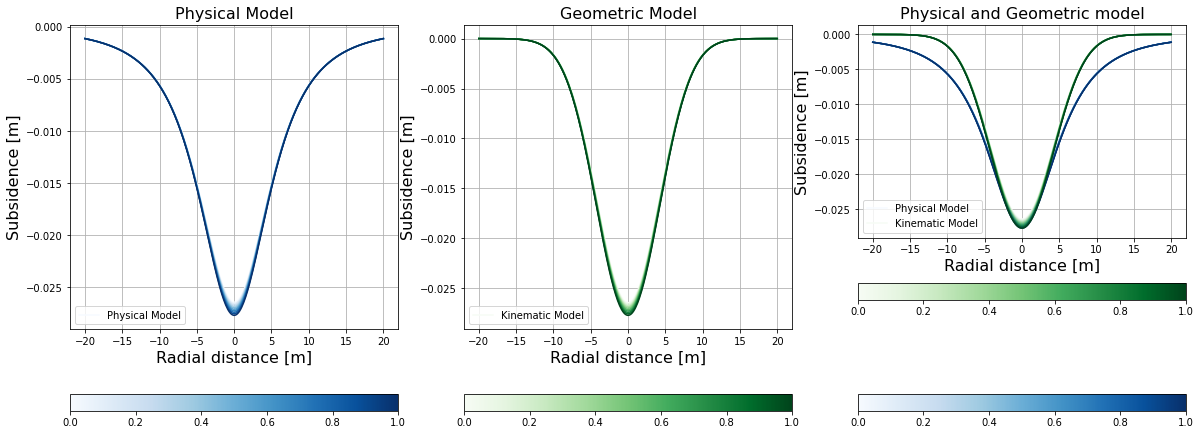

In [23]:
#color mappings
blues = plt.get_cmap('Blues')
# import matplotlib as mpl
# blues_list = mpl.colors.ListedColormap(np.array(list(map(blues,np.linspace(0,1,len(zl))))))
greens = plt.get_cmap('Greens')

img = plt.imshow(np.array([[0,1]]), cmap="Blues")
img.set_visible(False)
img2 = plt.imshow(np.array([[0,1]]), cmap="Greens")
img2.set_visible(False)
plt.close('all')

fig, axs = plt.subplots(ncols=3,figsize=(20,8))
save_max_sub = []

#---------plot subsidence ---------
tg = 0
x_mogi = x
y_mogi = y
z_mogi = z

for z in zl:
    
    de1D, dn1D, du1D = mogi(-1*Volume,poisson,x_mogi,y_mogi,z_mogi,x0,y0,z0)
    max_sub = -np.min(du1D)
    
    if tg == 0:
        axs[0].plot(x,du1D,c=blues(tg/(len(zl)-1)),label='Physical Model')        
        axs[1].plot(x,max_sub*geom_1D,c=greens(tg/(len(zl)-1)),label='Kinematic Model')
        axs[2].plot(x,du1D,c=blues(tg/(len(zl)-1)),label='Physical Model')        
        axs[2].plot(x,max_sub*geom_1D,c=greens(tg/(len(zl)-1)),label='Kinematic Model')
    else:
        axs[0].plot(x,du1D,c=blues(tg/(len(zl)-1)))        
        axs[1].plot(x,max_sub*geom_1D,c=greens(tg/(len(zl)-1)))        
        axs[2].plot(x,du1D,c=blues(tg/(len(zl)-1)))        
        axs[2].plot(x,max_sub*geom_1D,c=greens(tg/(len(zl)-1))) 
        
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()

    #admin stuf
    axs[0].set_xlabel('Radial distance [m]',fontsize=16)
    axs[0].set_ylabel('Subsidence [m]',fontsize=16)
    axs[0].grid(True)
    axs[0].set_title('Physical Model',fontsize=16)

    axs[1].set_xlabel('Radial distance [m]',fontsize=16)
    axs[1].set_ylabel('Subsidence [m]',fontsize=16)
    axs[1].grid(True)
    axs[1].set_title('Geometric Model',fontsize=16)

    axs[2].set_xlabel('Radial distance [m]',fontsize=16)
    axs[2].set_ylabel('Subsidence [m]',fontsize=16)
    axs[2].grid(True)
    axs[2].set_title('Physical and Geometric model',fontsize=16)

    #update coordinates physical model
    x_mogi = x_mogi + de1D
    y_mogi = y_mogi + dn1D
    z_mogi = z_mogi + du1D
    tg += 1
    save_max_sub.append(max_sub)



fig.colorbar(img,ax=axs[0],orientation="horizontal")
fig.colorbar(img2,ax=axs[1],orientation="horizontal")
fig.colorbar(img,ax=axs[2],orientation="horizontal")
fig.colorbar(img2,ax=axs[2],orientation="horizontal")

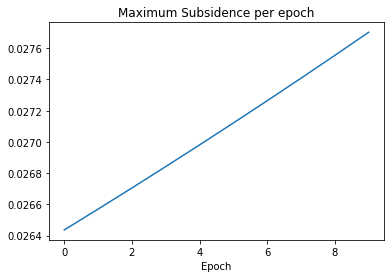

In [24]:
plt.figure()
plt.plot(range(len(save_max_sub)),save_max_sub)

plt.xlabel('Epoch')
plt.title('Maximum Subsidence per epoch');

# Topview ratio vert disp vs hor disp

In [152]:
#define parameters
# x0_center = 20
n = 300
x_range = 20
y_range = 20

#impending sinkholes
R = 15
draw = np.deg2rad(35)
H = R*np.tan(draw)

#mogi parameters
poisson = 0.3
Volume = (4/3) * np.pi * (1/2)**3
x0 = 0
y0 = 0
z0 = -H

# 1D array
x = np.linspace(-x_range+x0,x_range+x0,n)
y = np.linspace(-y_range+y0,y_range+y0,n)
z = np.zeros((n))

#2D array
zv = np.zeros((n,n))
xv, yv = np.meshgrid(x,y)

de, dn, du = mogi(-Volume,poisson,xv,yv,zv,x0,y0,z0)
de1D, dn1D, du1D = mogi(-Volume,poisson,x,y,z,x0,y0,z0)
max_sub = -np.min(du)

In [153]:
ratio = np.abs((np.abs(max_sub*hdisp(xv,x0,yv,y0,R,H))/np.abs(max_sub*zg(xv,x0,yv,y0,R))))

x_out = xv[:,150] 
bool_ratio = ratio[:,150]>1

for i,item in enumerate(bool_ratio):
    if item:
        pass
    else:
        print(i)
        break
        
dist_flip = np.abs(yv[i,150])

71


R flip=10.50. R rule of thumd = 10.00


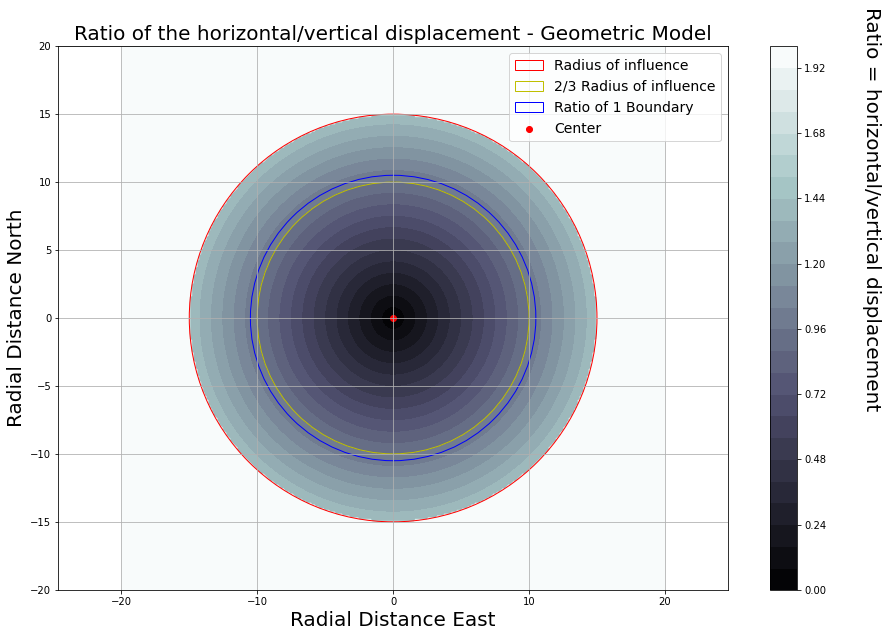

In [156]:
'''
Ratio Geometric model
'''
# ratio = np.abs((np.abs(max_sub*hdisp(xv,x0,yv,y0,R,H))/np.abs(max_sub*zg(xv,x0,yv,y0,R)))-1)
# ratio = np.abs((np.abs(max_sub*hdisp(xv,x0,yv,y0,R,H))/np.abs(max_sub*zg(xv,x0,yv,y0,R))))
R_flip1 = dist_flip
R_flip = (2/3)*R

print('R flip={:.02f}. R rule of thumd = {:.02f}'.format(R_flip1,R_flip))
# ratio[ratio>2] = 2
ratio[np.sqrt(xv**2 + yv**2)>R] =2

fig, ax = plt.subplots(figsize=(15,10))

h = ax.contourf(x,y,ratio, 25,cmap=plt.cm.bone, origin='lower')

cbar = plt.colorbar(h,ax=ax)
cbar.ax.text(7.5,1.4,'Ratio = horizontal/vertical displacement', ha='center', va='center',rotation=270,fontsize=20)
# cbar.ax.get_yaxis().set_ticks([])
# for j, lab in enumerate(['Vertical Dominant','Horizontal Dominant','No Displacement']):
#     cbar.ax.text(4, 0.5+j, lab, ha='center', va='center',rotation=270,fontsize=16)

circle1 = plt.Circle((0,0),R,color='r',fill=False,label='Radius of influence')
circle2 = plt.Circle((0,0),R_flip,color='y',fill=False,label='2/3 Radius of influence')
circle3 = plt.Circle((0,0),R_flip1,color='b',fill=False,label='Ratio of 1 Boundary')

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.scatter(0,0,c='r',label='Center')

ax.legend(fontsize=14)
ax.axis('equal')
ax.grid(True)
ax.set_title('Ratio of the horizontal/vertical displacement - Geometric Model',fontsize=20)
ax.set_xlabel('Radial Distance East',fontsize=20)
ax.set_ylabel('Radial Distance North',fontsize=20);

In [157]:
fig.savefig('Mov_ratio_geom.png')

In [138]:
#recompute the variables
Volume = (4/3) * np.pi * (1/2)**3
de1D, dn1D, du1D = mogi(-Volume,poisson,xv,yv,zv,x0,y0,z0)
hor_disp = np.sqrt((de1D)**2 + (dn1D)**2)

ratio_geom = np.abs((np.abs(hor_disp)/np.abs(du1D)))

x_out = xv[:,150] 
bool_ratio = ratio_geom[:,150]>1

for i,item in enumerate(bool_ratio):
    if item:
        pass
    else:
        print(i)
        break
        
dist_flip = np.abs(yv[i,150])

71


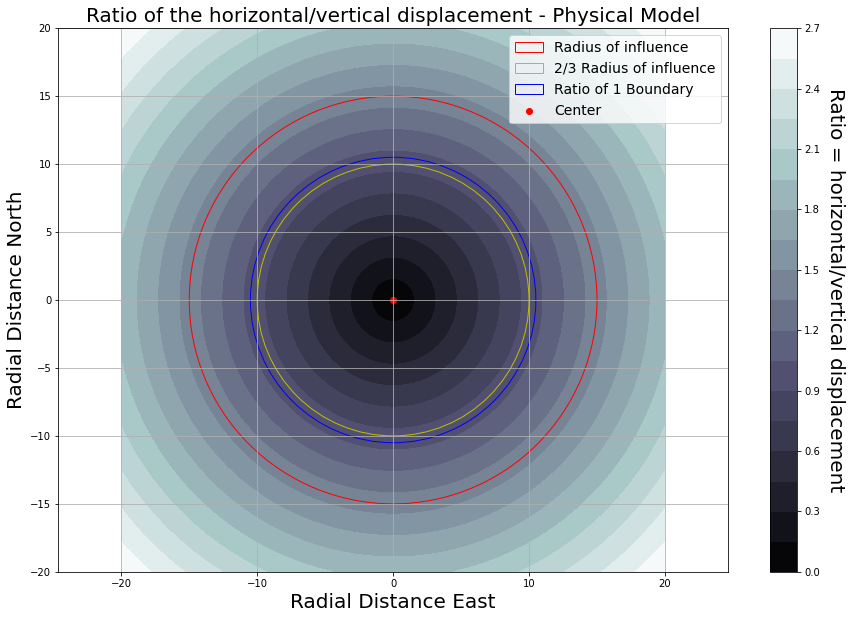

In [150]:
'''
Ratio Physical model
'''
# ratio_geom[ratio_geom>2] = 2
R_flip1 = dist_flip
R_flip = (2/3)*R

fig, ax = plt.subplots(figsize=(15,10))

h = ax.contourf(x,y,ratio_geom, 25,cmap=plt.cm.bone, origin='lower')

cbar = plt.colorbar(h,ax=ax)
cbar.ax.text(6.5,1.4,'Ratio = horizontal/vertical displacement', ha='center', va='center',rotation=270,fontsize=20)
# cbar.ax.get_yaxis().set_ticks([])
# for j, lab in enumerate(['Vertical Dominant','Horizontal Dominant']):
#     cbar.ax.text(2.8, 0.5+j, lab, ha='center', va='center',rotation=270,fontsize=16)

circle1 = plt.Circle((0,0),R,color='r',fill=False,label='Radius of influence')
circle2 = plt.Circle((0,0),R_flip,color='y',fill=False,label='2/3 Radius of influence')
circle3 = plt.Circle((0,0),R_flip1,color='b',fill=False,label='Ratio of 1 Boundary')

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.scatter(0,0,c='r',label='Center')
# ax.plot([0,4.8],[0,0])
# ax.plot([0,4.6669],[0,0])

ax.legend(fontsize=14)
ax.grid(True)
ax.axis('equal')
ax.set_title('Ratio of the horizontal/vertical displacement - Physical Model',fontsize=20)
ax.set_xlabel('Radial Distance East',fontsize=20)
ax.set_ylabel('Radial Distance North',fontsize=20);

In [151]:
fig.savefig('Mov_ratio_phys.png')

# Strain analysis

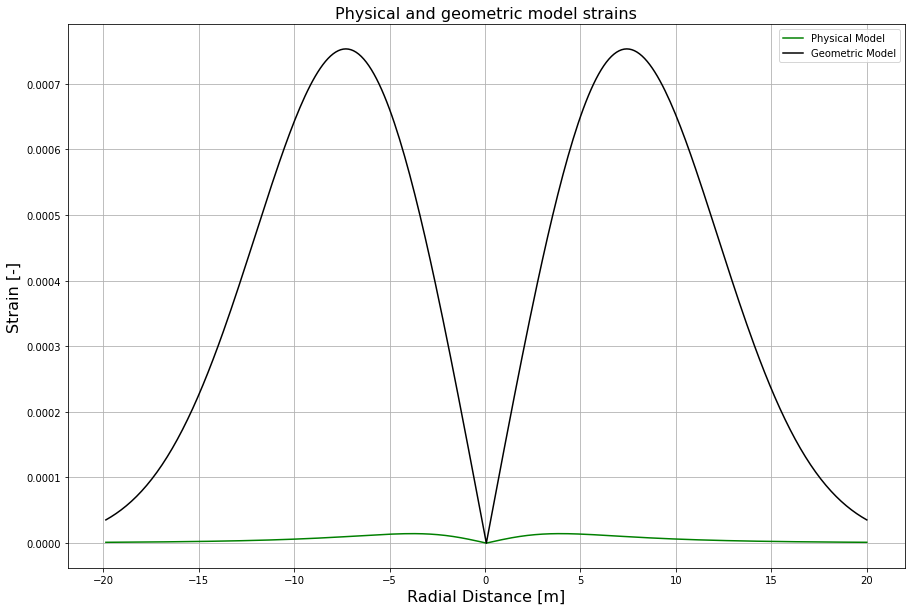

In [27]:
'''
Not the magnitude of the point change but the new location of the point is plotted in this cell.
'''

#recompute the variables
geom_1D = zg(x,x0,0,0,R)
de1D, dn1D, du1D = mogi(-Volume,poisson,x,y,z,x0,y0,z0)
Volume = (4/3) * np.pi * (1/2)**3



#compute some variables
tn = 10
t = np.linspace(-1,6,tn)        
t0 = 0
a = 0.01
b = 0.01

zl = np.array([time_function(x,t0,a,b,'linear') for x in t])

#-----create figure-----#
fig, ax = plt.subplots(ncols=1,figsize=(15,10))
save_max_sub2 = []
save_max_disp = []
save_max_disp_idx = []

#---------plot subsidence ---------
tg = 0
x_mogi = x
y_mogi = y
z_mogi = z


    
de1D, dn1D, du1D = mogi(-1*Volume,poisson,x_mogi,y_mogi,z_mogi,x0,y0,z0)

#update coordinates physical model - new surface shape
x_mogi = x_mogi + de1D
y_mogi = y_mogi + dn1D
z_mogi = z_mogi + du1D

max_sub = -np.min(z_mogi)
xdisp=max_sub*xhdisp(x,x0,0,0,R,H)
mogi_disp = x_mogi-x


East_Up_Movement = np.sqrt((du1D)**2 + (de1D)**2)
Geom_EW = np.sqrt((max_sub*geom_1D)**2 + (xdisp)**2)

diff2_East_Up_Movement = np.abs(East_Up_Movement[1:]-East_Up_Movement[:-1])
diff_geom_ew = np.abs(Geom_EW[1:]-Geom_EW[:-1])

#geometrical model






        
# ax.plot(x,diff_East_Up_Movement,c='r')
ax.plot(x[1:],diff2_East_Up_Movement,c='g',label='Physical Model')
ax.plot(x[1:],diff_geom_ew,c='k',label='Geometric Model')
#     ax.annotate('$t_{'+str(tg+1)+'}$' , # this is the text
#                  (-1,xdisp[132]), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,0), # distance from text to points (x,y)
#                  bbox=dict(facecolor='white', edgecolor='black'),
#                  ha='center')

tg -= -1
max_disp = np.where(np.max(mogi_disp)==mogi_disp)[0][0]

#     ax.scatter(x[max_disp],mogi_disp[max_disp],c='r')

save_max_disp.append(mogi_disp[max_disp])
save_max_disp_idx.append(max_disp)

    
# ax.plot(x[save_max_disp_idx],save_max_disp,c='r')
ax.set_title('Physical and geometric model strains',fontsize=16)
ax.set_xlabel('Radial Distance [m]',fontsize=16)
ax.set_ylabel('Strain [-]',fontsize=16)
ax.legend()
ax.grid(True)